# Hierárquicos / aglomerativos

## 1 - Métodos hierárquicos de agrupamento

- Compreender os métodos de agrupamento aglomerativo e hierárquico
- Aplicar o método de agrupamento aglomerativo em um conjunto de dados
- Comparar os resultados do agrupamento com as categorias originais

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering ###

#### Carregar a base de dados

Utilizaremos a base de dados `penguins` e faremos:
- Nomear o índice, para podermos voltar a informação dos agrupamentos na base original - vamos usar esse índice como chave, por isso ele precisa ter um nome
- Eliminar valores missing nas variáveis quantitativas

In [22]:
peng = sns.load_dataset('penguins')
peng.index.name='id'
peng_num = peng.select_dtypes('number').dropna()

In [24]:
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
id,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [26]:
peng_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
id,,,,
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


#### Visualização de dados

O gráfico de dispersão nos mostra os dados que vamos ajustar, colorido pela espécie. Lembrando que embora as espécies mostrem agrupamentos naturais nessa base de dados, não queremos classificar os dados nas espécies, mas sim encontrar padrões naturais - que se coincidirem com as espécies será somente uma feliz coincidência.

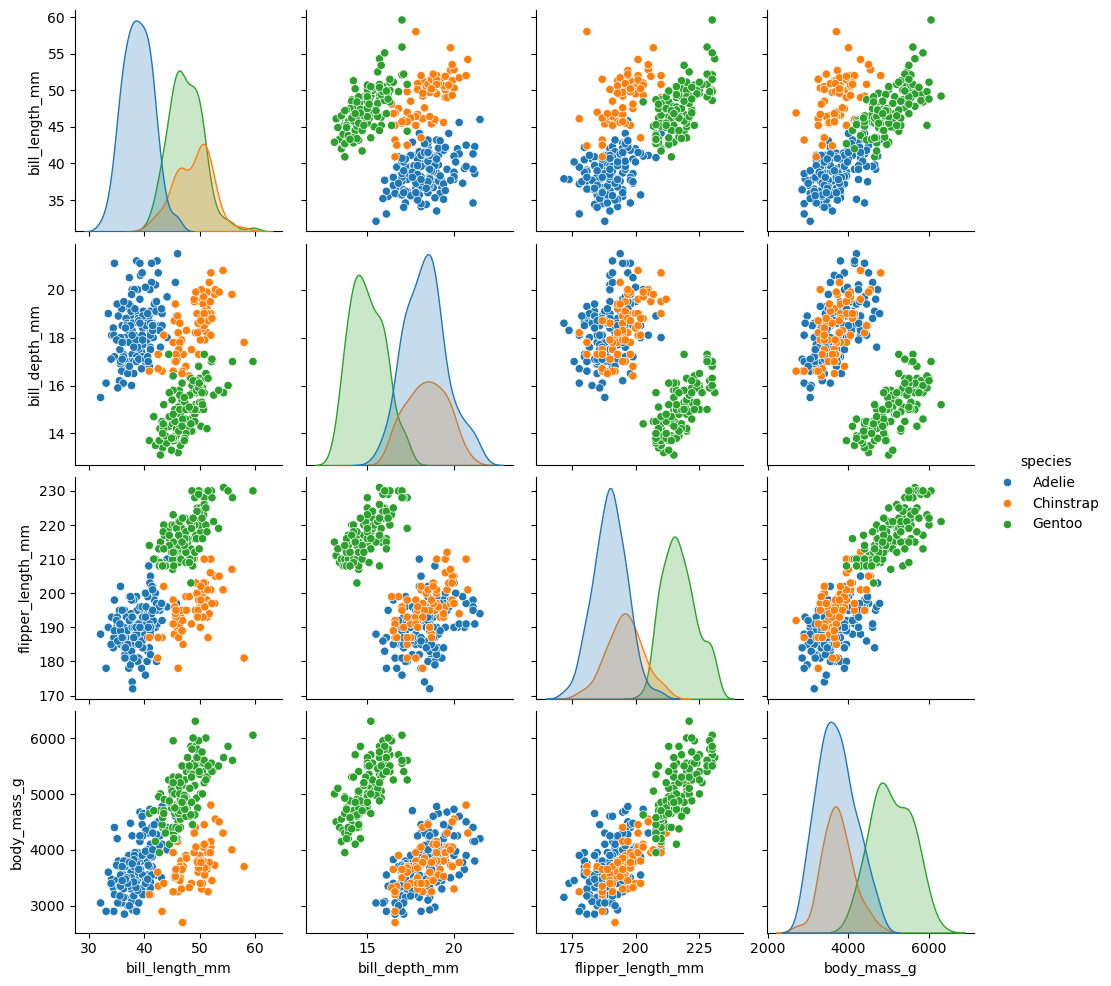

In [29]:
sns.pairplot(peng, hue='species')
plt.show()

#### Padronização dos dados

Existem diferentes formas de padronizar os dados, umas entre as mais populares é esta, que deixa a variável com média zero e desvio padrão 1.

In [32]:
padronizador = StandardScaler()
peng_pad = padronizador.fit_transform(peng_num)

In [40]:
pd.DataFrame(peng_pad, columns=peng_num.columns).head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,-1.324737,1.089724,-0.563715,-0.938776
4,-0.847812,1.748985,-0.777373,-0.689020


#### Definir o objeto do agrupamento

Vamos definir um objeto da classe do agrupamento que queremos fazer - isso significa que ele vai ter os métodos e atributos convenientes para o nosso estudo. Vamos indicar neste passo também os parâmetros do algoritmo.

In [43]:
clus = AgglomerativeClustering(
    linkage='complete',
    distance_threshold = None,
    n_clusters = 3
)

#### Treinamento do algoritmo
Agora sim vamos atribuir os dados, o algoritmo roda, e no objeto criado ficam as informações pertinentes, como por exemplo o rótulo dos grupos para cada linha do *data frame* 

In [47]:
clus.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

#### Marcando a base original

Utilizando o método `labels_` para extrair os rótulos do objeto de agrupamento. Em seguida vamos adicionar as informações à tabela original.

In [50]:
clus.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [54]:
peng_num['grupo'] = clus.labels_
peng_num.head() # Note que o id 3, que é missing, não existe

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
id,,,,,
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,1



Lembrando que removemos valores missing, o que tem impacto com a ordem das linhas da tabela. Assim, precisamos fazer um *left join* usando como chave o *index* da base original, o qual demos um nome logo que carregamos os dados, especialmente para poder executar este passo.

In [57]:
peng = peng.merge(peng_num['grupo'], how='left', on='id')

In [59]:
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0


note o comportamento do dado faltante. A base original possui dados missing.

#### Visualizando os grupos



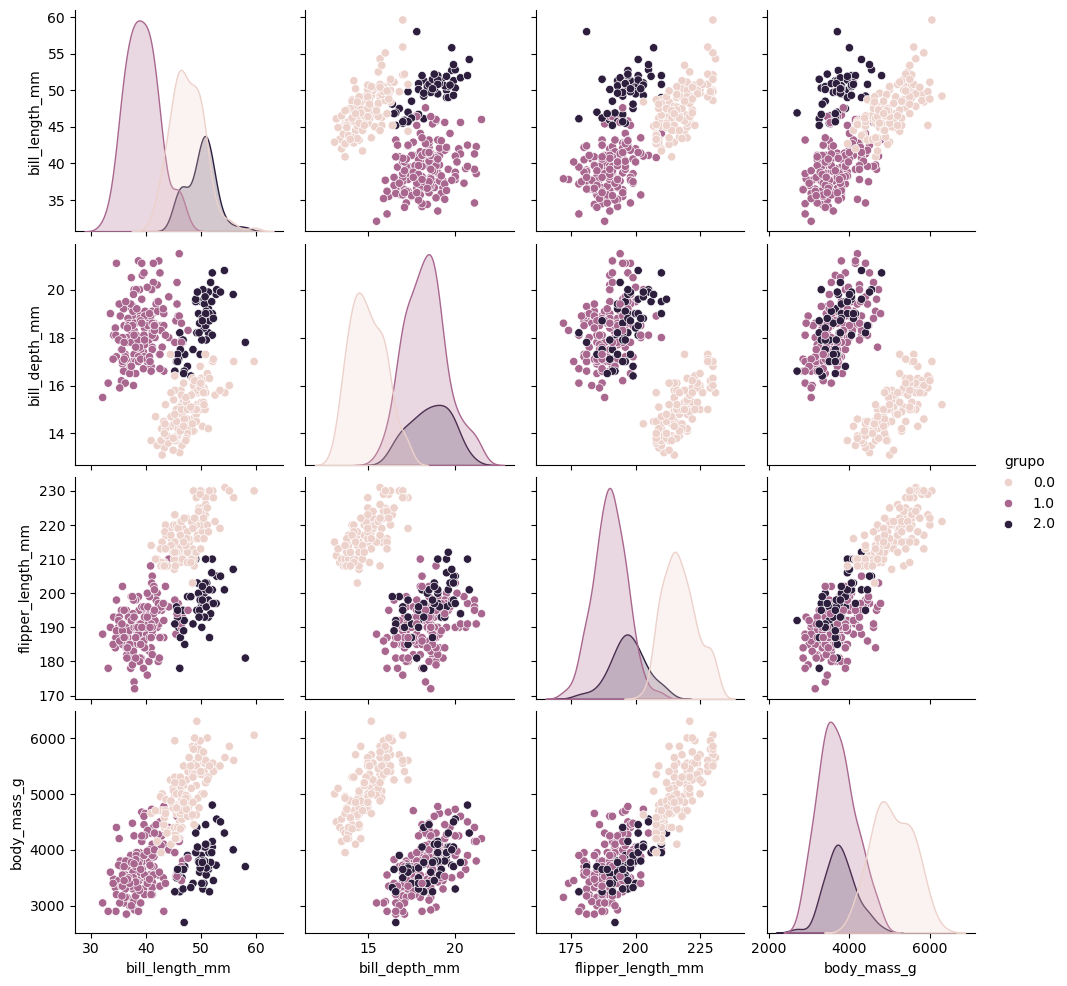

In [66]:
sns.pairplot(data=peng, hue='grupo')
plt.show()

Aparentemente conseguimos identificar muito bem grupos de pinguins semelhantes dentro do grupo, mas diferentes entre grupos.

In [74]:
# Tabela cruzada 

pd.crosstab(peng.species, peng.grupo)

grupo,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


## 2 - Algoritmo

- Compreender a aplicação do algoritmo de agrupamento hierárquico
- Aplicar o algoritmo de agrupamento hierárquico usando Python
- Analisar os resultados obtidos com o algoritmo de agrupamento hierárquico.

Vamos discutir o algoritmo e rodar passo a passo, para podermos ter uma sensibilidade e uma ideia intuitiva do seu funcionamento. Tipicamente esse entendimento ajuda muito a entendermos as diferenças entre algoritmos, suas características, quando roda bem e quando não, e por fim, ajuda a decidir qual algoritmo usar no problema que temos na nossa frente.

A ideia básica do algoritmo é a seguinte:

1. Calcular as distâncias para todos os pares de pontos da nossa tabela. Isso significa calcular $(n^2-n)/2$ distâncias.<br>
    Calcular todas as distâncias significa calcular uma matriz de distâncias entre cada par de pontos. A matriz de distâncias vai ter essa cara:

<div>
    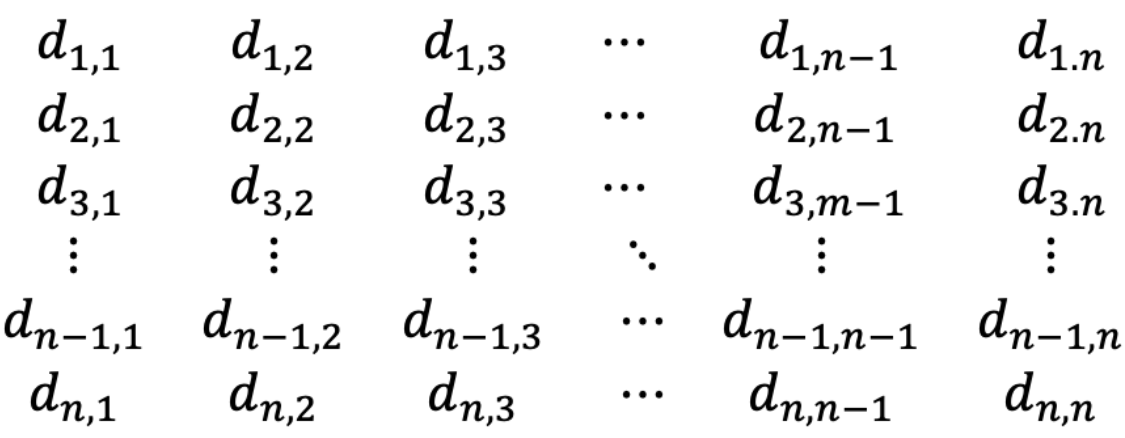
</div>


em que $d_{i, j}$ é a distância entre o ponto i e o ponto j.
<br>

2. Encontrar a menor distância <br>
    $d_{min} = min_{i, j}(d_{i,j}) $ <br>
    com $i \ne j$<br><br>

3. Agrupar o par correspondente à menor distância. Ou seja, recalcular as distâncias desse novo 'ponto' a todos os demais.

<div>
    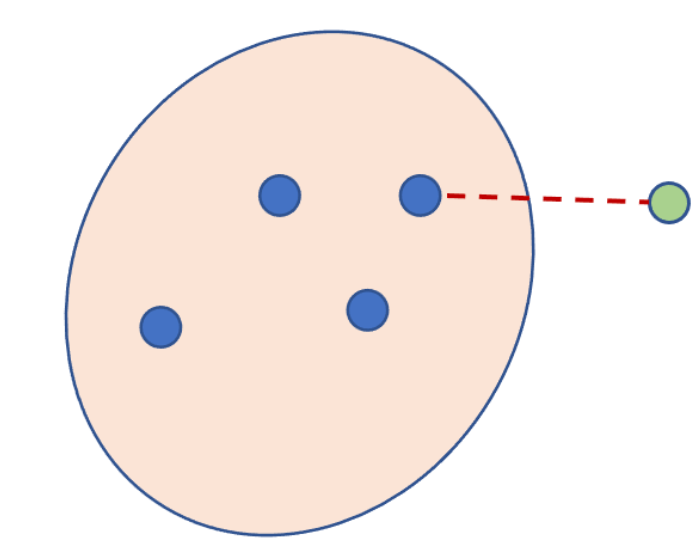
</div>

3. Repetir 2 e 3 até agrupar todos os elementos em um grande agrupamento.




Repare que como $d_{i, j}$ = $d_{j, i}$, a matriz de distâncias fica com essa cara:

<div>
    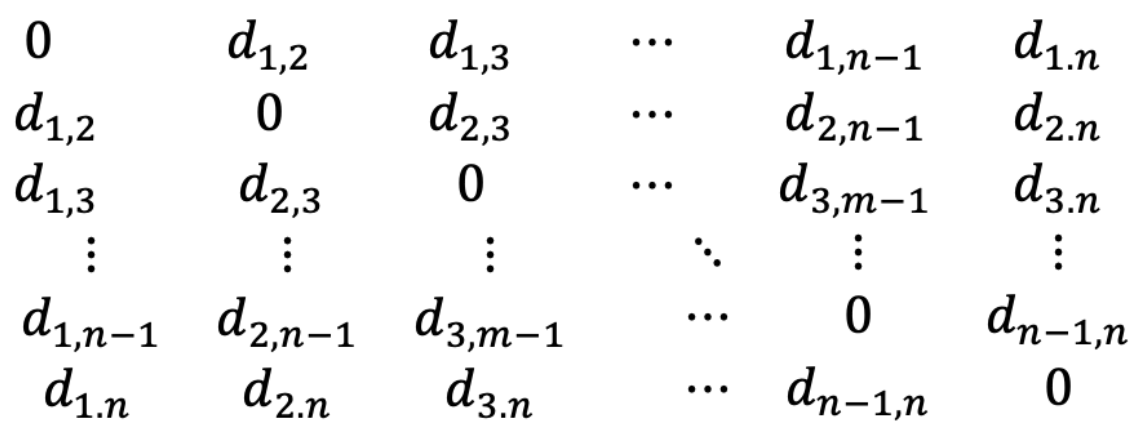
</div>

In [199]:
# Importando bibliotecas

import time as time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import distance

#### Gerando os dados

Geraremos 12 pontos com variáveis `x`e `y`, com agrupamento natural identificavel visualmente.

In [201]:
# Dados
np.random.seed(2360873)
x = np.random.normal([1,2,3]*4, .2, 12)
y = np.random.normal([0,2,0]*4, .2, 12)

pontos = pd.DataFrame(np.c_[x,y], columns=['x', 'y'])
# pontos = pd.DataFrame({'x': x, 'y':y})
pontos

,x,y
0,0.808025,0.002214
1,1.836726,1.864276
2,3.144988,0.150698
3,1.185140,-0.074400
4,2.135976,2.195185
5,2.707983,0.015969
6,0.989527,0.187312
7,1.795878,1.957112
8,2.496841,0.041325
9,0.965620,0.339734


#### Fazer gráfico

Vamos fazer o gráfico, identificando cada ponto pelo rótulo, dando uma cor para cada grupo. Inicialmente, cada ponto pertence a seu próprio grupo, então teremos 12 cores.

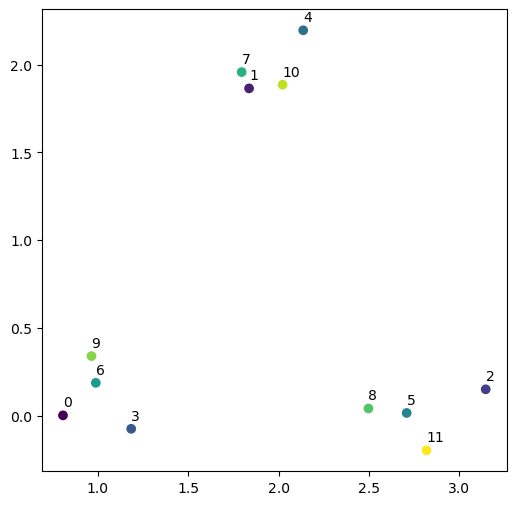

In [203]:
fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)

cores = pontos.index.values
ax.scatter(pontos.x, pontos.y, c=cores)

for idx, col in pontos.iterrows():
    ax.annotate(idx, (col.x, col.y + 0.05))

#### Calculando a distância

Vamos calcular a distância para todos os pares de pontos

In [205]:
distancias = distance.cdist(pontos, pontos, 'euclidean')
d = pd.DataFrame(distancias)
d

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,2.127323,2.341675,0.384819,2.563704,1.900008,0.259238,2.190315,1.689269,0.372500,2.240290,2.019802
1,2.127323,0.000000,2.155898,2.045245,0.446151,2.043361,1.878817,0.101425,1.938788,1.755863,0.186419,2.282617
2,2.341675,2.155898,0.000000,1.972732,2.279919,0.457302,2.155771,2.254602,0.657310,2.187550,2.066217,0.477036
3,0.384819,2.045245,1.972732,0.000000,2.460712,1.525522,0.326737,2.121329,1.316796,0.468717,2.130701,1.637443
4,2.563704,0.446151,2.279919,2.460712,0.000000,2.253036,2.312120,0.415145,2.183881,2.193725,0.330387,2.487178
5,1.900008,2.043361,0.457302,1.525522,2.253036,0.000000,1.726977,2.144754,0.212659,1.772188,1.991030,0.239403
6,0.259238,1.878817,2.155771,0.326737,2.312120,1.726977,0.000000,1.944837,1.514366,0.154286,1.987058,1.868365
7,2.190315,0.101425,2.254602,2.121329,0.415145,2.144754,1.944837,0.000000,2.039997,1.818031,0.237296,2.383999
8,1.689269,1.938788,0.657310,1.316796,2.183881,0.212659,1.514366,2.039997,0.000000,1.560027,1.903930,0.399730
9,0.372500,1.755863,2.187550,0.468717,2.193725,1.772188,0.154286,1.818031,1.560027,0.000000,1.871900,1.928489


#### Menos distância

Vamos identificar dois pontos mais próximos através da distância entre eles.

In [207]:
D = d[d!=0].copy()
D.style.highlight_min(axis=None).format(precision=2, decimal='.')

,0,1,2,3,4,5,6,7,8,9,10,11
0,nan,2.13,2.34,0.38,2.56,1.90,0.26,2.19,1.69,0.37,2.24,2.02
1,2.13,nan,2.16,2.05,0.45,2.04,1.88,0.10,1.94,1.76,0.19,2.28
2,2.34,2.16,nan,1.97,2.28,0.46,2.16,2.25,0.66,2.19,2.07,0.48
3,0.38,2.05,1.97,nan,2.46,1.53,0.33,2.12,1.32,0.47,2.13,1.64
4,2.56,0.45,2.28,2.46,nan,2.25,2.31,0.42,2.18,2.19,0.33,2.49
5,1.90,2.04,0.46,1.53,2.25,nan,1.73,2.14,0.21,1.77,1.99,0.24
6,0.26,1.88,2.16,0.33,2.31,1.73,nan,1.94,1.51,0.15,1.99,1.87
7,2.19,0.10,2.25,2.12,0.42,2.14,1.94,nan,2.04,1.82,0.24,2.38
8,1.69,1.94,0.66,1.32,2.18,0.21,1.51,2.04,nan,1.56,1.90,0.40
9,0.37,1.76,2.19,0.47,2.19,1.77,0.15,1.82,1.56,nan,1.87,1.93


#### Agrupar os elementos respectivos

Para agrupar os elementos, vamos identificar os índices e "recalcular" a matriz de distâncias. Claro que não precisamos recalcular tudo, mas somente as distâncias ao novo elemento agrupado. Há várias formas de fazer esse cálculo que é o que chamamos de **método de agregação**. Vamos utilizar um bastante popular que é o ***complete linkage*** (ou ligação completa), que consiste em definir a distância de um ponto qualquer $p_j$ à unidade recém agregada como o mínimo entre as distância entre o ponto $p_j$ e cada um dos pontos da unidade agregada.

In [209]:
D.min(), D.min().min()

(0     0.259238
 1     0.101425
 2     0.457302
 3     0.326737
 4     0.330387
 5     0.212659
 6     0.154286
 7     0.101425
 8     0.212659
 9     0.154286
 10    0.186419
 11    0.239403
 dtype: float64,
 0.10142537250432097)

In [210]:
D.loc[D.min() == D.min().min()]

,0,1,2,3,4,5,6,7,8,9,10,11
1,2.127323,NaN,2.155898,2.045245,0.446151,2.043361,1.878817,0.101425,1.938788,1.755863,0.186419,2.282617
7,2.190315,0.101425,2.254602,2.121329,0.415145,2.144754,1.944837,NaN,2.039997,1.818031,0.237296,2.383999


In [211]:
D.loc[:,D.min() == D.min().min()]

,1,7
0,2.127323,2.190315
1,NaN,0.101425
2,2.155898,2.254602
3,2.045245,2.121329
4,0.446151,0.415145
5,2.043361,2.144754
6,1.878817,1.944837
7,0.101425,NaN
8,1.938788,2.039997
9,1.755863,1.818031


In [212]:
# Identificando índices com os elementos a serem agrupados
juntar = set(D.loc[:,D.min() == D.min().min()].columns)
juntar

{1, 7}

#### Gráfico intermediário

O gráfico abaixo vai mostrar como 'está' o agrupamento neste passo, agora devemos ter uma cor a menos, pois dois pontos vão estar agrupados.

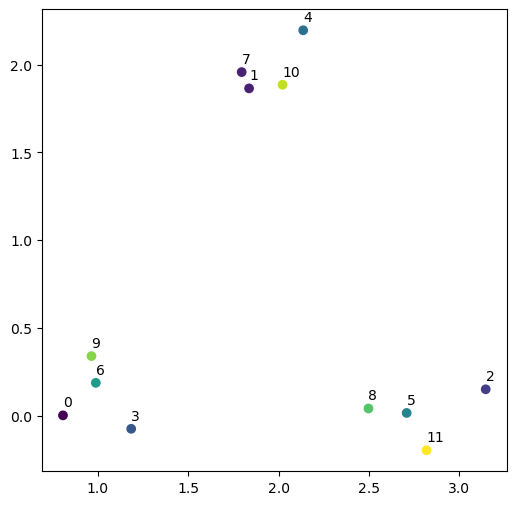

In [214]:
cores[(cores == max(juntar)) | (cores == min(juntar))] = min(juntar)

fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)

ax.scatter(pontos.x, pontos.y, c=cores)

for idx, col in pontos.iterrows():
    ax.annotate(idx, (col.x, col.y + .05))

#### Alterando a matriz de distâncias

Calculando novamente a matriz de distâncias para encontrar o *proximo* ponto a ser agregado.

In [216]:
D.loc[:, min(list(juntar))] = d[list(juntar)].min(axis=1)
D.loc[min(juntar)] = d[list(juntar)].min(axis=1).replace(0, np.nan)
D.drop(columns = juntar - {min(juntar)}, index = juntar - {min(juntar)}, inplace=True)

D.style.highlight_min(axis=None)

,0,1,2,3,4,5,6,8,9,10,11
0,nan,2.127323,2.341675,0.384819,2.563704,1.900008,0.259238,1.689269,0.372500,2.240290,2.019802
1,2.127323,nan,2.155898,2.045245,0.415145,2.043361,1.878817,1.938788,1.755863,0.186419,2.282617
2,2.341675,2.155898,nan,1.972732,2.279919,0.457302,2.155771,0.657310,2.187550,2.066217,0.477036
3,0.384819,2.045245,1.972732,nan,2.460712,1.525522,0.326737,1.316796,0.468717,2.130701,1.637443
4,2.563704,0.415145,2.279919,2.460712,nan,2.253036,2.312120,2.183881,2.193725,0.330387,2.487178
5,1.900008,2.043361,0.457302,1.525522,2.253036,nan,1.726977,0.212659,1.772188,1.991030,0.239403
6,0.259238,1.878817,2.155771,0.326737,2.312120,1.726977,nan,1.514366,0.154286,1.987058,1.868365
8,1.689269,1.938788,0.657310,1.316796,2.183881,0.212659,1.514366,nan,1.560027,1.903930,0.399730
9,0.372500,1.755863,2.187550,0.468717,2.193725,1.772188,0.154286,1.560027,nan,1.871900,1.928489
10,2.240290,0.186419,2.066217,2.130701,0.330387,1.991030,1.987058,1.903930,1.871900,nan,2.228744


In [217]:
juntar - {min(juntar)}

{7}

#### Funções

Façamos duas função para facilitar o processo, considerando que ele será repetido múltiplas vezes.

In [219]:
def acha_indice(D, pontos, cores):
    # localizando os índices de menor distância
    juntar = set(D.loc[:,D.min() == D.min().min()].columns)

    cores[(cores == max(juntar)) | (cores == min(juntar))] = min(juntar)

    fig = plt.figure(figsize=[6,6])
    ax = fig.add_subplot(111)

    ax.scatter(pontos.x, pontos.y, c=cores)

    for idx, col in pontos.iterrows():
        ax.annotate(idx, (col.x, col.y + .05))

    print(juntar)
    return juntar

In [220]:
def agrupar(D, d, juntar):
    D.loc[:, min(list(juntar))] = d[list(juntar)].min(axis=1)
    D.loc[min(list(juntar))] = d[list(juntar)].min(axis=1).replace(0, np.nan)
    D.drop(columns = juntar - {min(juntar)}, index= juntar - {min(juntar)}, inplace=True)

    display(D.style.highlight_min(axis=None))
    return D

#### Passo 2

{9, 6}


,0,1,2,3,4,5,6,8,10,11
0,nan,2.127323,2.341675,0.384819,2.563704,1.900008,0.259238,1.689269,2.240290,2.019802
1,2.127323,nan,2.155898,2.045245,0.415145,2.043361,1.755863,1.938788,0.186419,2.282617
2,2.341675,2.155898,nan,1.972732,2.279919,0.457302,2.155771,0.657310,2.066217,0.477036
3,0.384819,2.045245,1.972732,nan,2.460712,1.525522,0.326737,1.316796,2.130701,1.637443
4,2.563704,0.415145,2.279919,2.460712,nan,2.253036,2.193725,2.183881,0.330387,2.487178
5,1.900008,2.043361,0.457302,1.525522,2.253036,nan,1.726977,0.212659,1.991030,0.239403
6,0.259238,1.755863,2.155771,0.326737,2.193725,1.726977,nan,1.514366,1.871900,1.868365
8,1.689269,1.938788,0.657310,1.316796,2.183881,0.212659,1.514366,nan,1.903930,0.399730
10,2.240290,0.186419,2.066217,2.130701,0.330387,1.991030,1.871900,1.903930,nan,2.228744
11,2.019802,2.282617,0.477036,1.637443,2.487178,0.239403,1.868365,0.399730,2.228744,nan


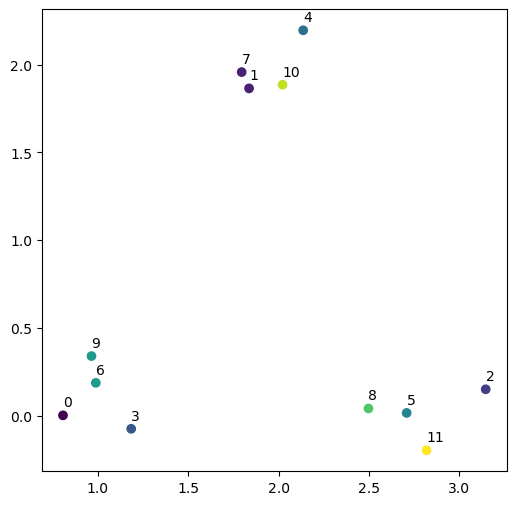

In [222]:
juntar = acha_indice(D, pontos, cores)
D = agrupar(D, d, juntar)

#### Passo 3

{1, 10}


,0,1,2,3,4,5,6,8,11
0,nan,2.127323,2.341675,0.384819,2.563704,1.900008,0.259238,1.689269,2.019802
1,2.127323,nan,2.066217,2.045245,0.330387,1.991030,1.878817,1.903930,2.228744
2,2.341675,2.066217,nan,1.972732,2.279919,0.457302,2.155771,0.657310,0.477036
3,0.384819,2.045245,1.972732,nan,2.460712,1.525522,0.326737,1.316796,1.637443
4,2.563704,0.330387,2.279919,2.460712,nan,2.253036,2.193725,2.183881,2.487178
5,1.900008,1.991030,0.457302,1.525522,2.253036,nan,1.726977,0.212659,0.239403
6,0.259238,1.878817,2.155771,0.326737,2.193725,1.726977,nan,1.514366,1.868365
8,1.689269,1.903930,0.657310,1.316796,2.183881,0.212659,1.514366,nan,0.399730
11,2.019802,2.228744,0.477036,1.637443,2.487178,0.239403,1.868365,0.399730,nan


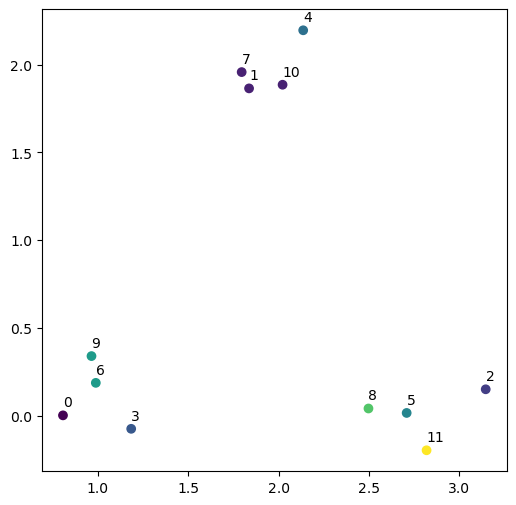

In [240]:
juntar = acha_indice(D, pontos, cores)
D = agrupar(D, d, juntar)

#### Passo 4

{8, 5}


,0,1,2,3,4,5,6,11
0,nan,2.127323,2.341675,0.384819,2.563704,1.689269,0.259238,2.019802
1,2.127323,nan,2.066217,2.045245,0.330387,1.938788,1.878817,2.228744
2,2.341675,2.066217,nan,1.972732,2.279919,0.457302,2.155771,0.477036
3,0.384819,2.045245,1.972732,nan,2.460712,1.316796,0.326737,1.637443
4,2.563704,0.330387,2.279919,2.460712,nan,2.183881,2.193725,2.487178
5,1.689269,1.938788,0.457302,1.316796,2.183881,nan,1.514366,0.239403
6,0.259238,1.878817,2.155771,0.326737,2.193725,1.514366,nan,1.868365
11,2.019802,2.228744,0.477036,1.637443,2.487178,0.239403,1.868365,nan


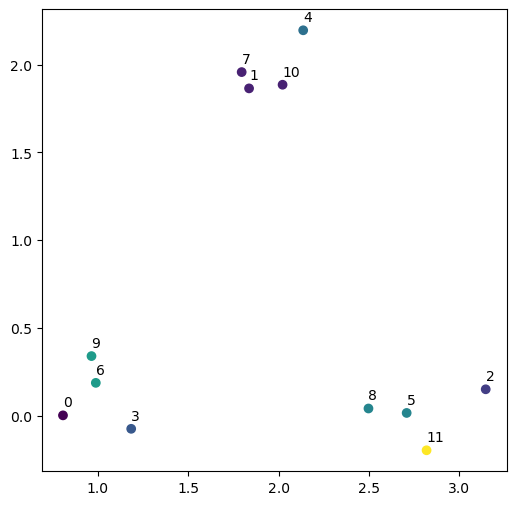

In [243]:
juntar = acha_indice(D, pontos, cores)
D = agrupar(D, d, juntar)

#### Passo 5

{11, 5}


,0,1,2,3,4,5,6
0,nan,2.127323,2.341675,0.384819,2.563704,1.900008,0.259238
1,2.127323,nan,2.066217,2.045245,0.330387,2.043361,1.878817
2,2.341675,2.066217,nan,1.972732,2.279919,0.457302,2.155771
3,0.384819,2.045245,1.972732,nan,2.460712,1.525522,0.326737
4,2.563704,0.330387,2.279919,2.460712,nan,2.253036,2.193725
5,1.900008,2.043361,0.457302,1.525522,2.253036,nan,1.726977
6,0.259238,1.878817,2.155771,0.326737,2.193725,1.726977,nan


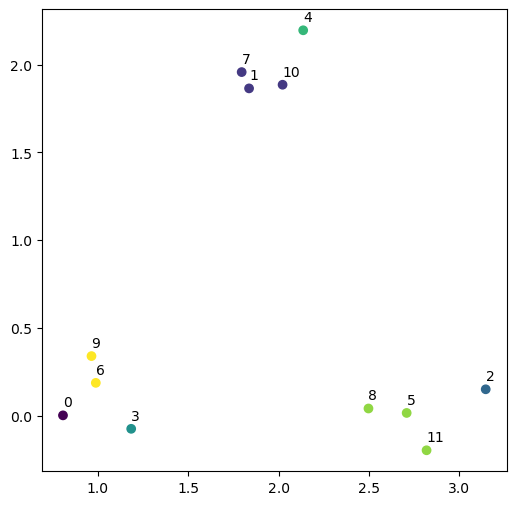

In [246]:
juntar = acha_indice(D, pontos, cores)
D = agrupar(D, d, juntar)

#### Passo 6

{0, 6}


,0,1,2,3,4,5
0,nan,1.878817,2.155771,0.326737,2.312120,1.726977
1,1.878817,nan,2.066217,2.045245,0.330387,2.043361
2,2.155771,2.066217,nan,1.972732,2.279919,0.457302
3,0.326737,2.045245,1.972732,nan,2.460712,1.525522
4,2.312120,0.330387,2.279919,2.460712,nan,2.253036
5,1.726977,2.043361,0.457302,1.525522,2.253036,nan


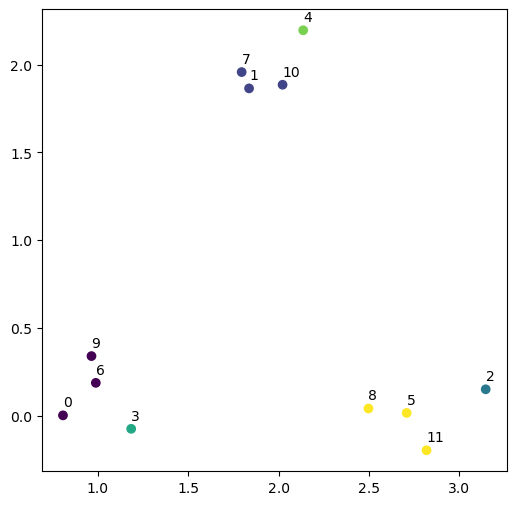

In [249]:
juntar = acha_indice(D, pontos, cores)
D = agrupar(D, d, juntar)

#### Passo 7

{0, 3}


,0,1,2,4,5
0,nan,2.045245,1.972732,2.460712,1.525522
1,2.045245,nan,2.066217,0.330387,2.043361
2,1.972732,2.066217,nan,2.279919,0.457302
4,2.460712,0.330387,2.279919,nan,2.253036
5,1.525522,2.043361,0.457302,2.253036,nan


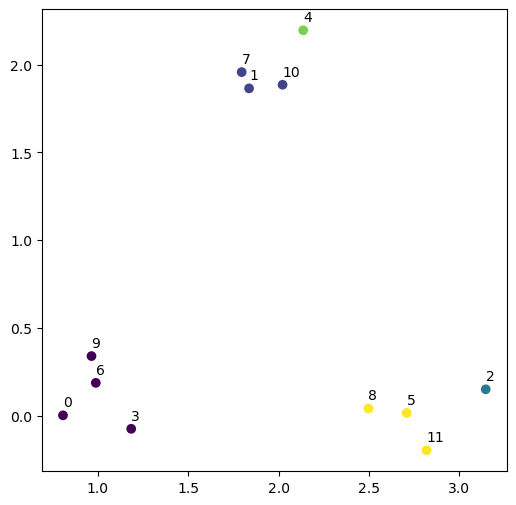

In [252]:
juntar = acha_indice(D, pontos, cores)
D = agrupar(D, d, juntar)

#### Passo 8

{1, 4}


,0,1,2,5
0,nan,2.127323,1.972732,1.525522
1,2.127323,nan,2.155898,2.043361
2,1.972732,2.155898,nan,0.457302
5,1.525522,2.043361,0.457302,nan


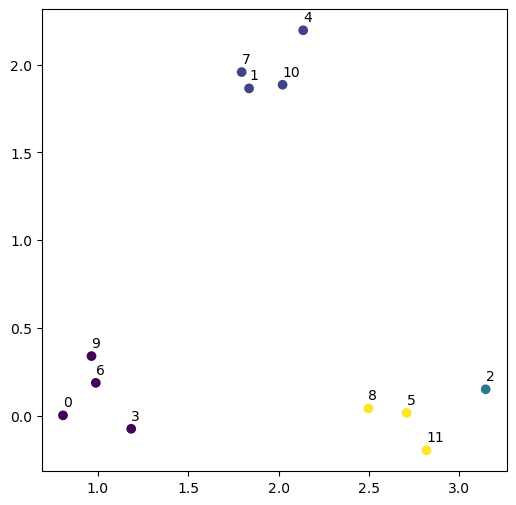

In [255]:
juntar = acha_indice(D, pontos, cores)
D = agrupar(D, d, juntar)

#### Passo 9

{2, 5}


,0,1,2
0,nan,2.127323,1.900008
1,2.127323,nan,2.043361
2,1.900008,2.043361,nan


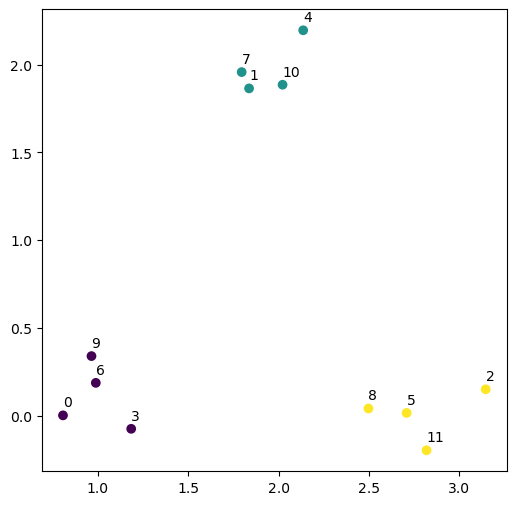

In [258]:
juntar = acha_indice(D, pontos, cores)
D = agrupar(D, d, juntar)

#### Passo 10

{0, 2}


,0,1
0,nan,2.127323
1,2.127323,nan


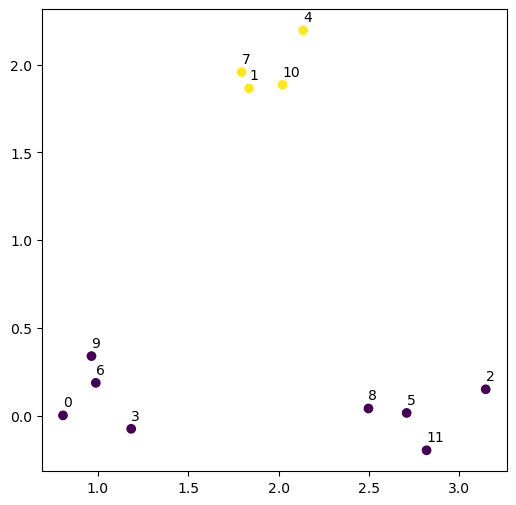

In [261]:
juntar = acha_indice(D, pontos, cores)
D = agrupar(D, d, juntar)

#### Passo 11

{0, 1}


,0
0,nan


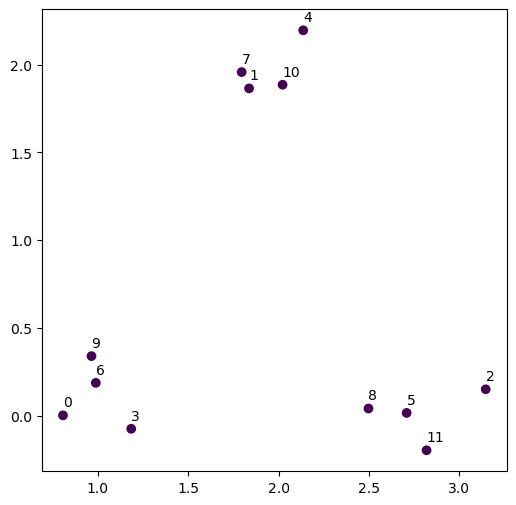

In [264]:
juntar = acha_indice(D, pontos, cores)
D = agrupar(D, d, juntar)

O algoritmos vai juntando os pontos mais próximos sucessivamente e depois agrupo os grupos pela ordem de menor distância entre eles.

## 3 - Visualização do algoritmo - Dendograma

- Compreender o conceito de dendrograma
- Aprender a criar um dendrograma
- Interpretar agrupamentos hierárquicos em dados

Essa palavrinha esquisita vem do grego, *déndron* que significa árvore, então dendrograma é um **diagrama de árvore**. É uma técnica muito popular nesse tipo de agrupamento para ajudar a escolher o número de grupos a se utilizar através de um gráfico bem simpático.

In [313]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc # o Dendrograma está aqui

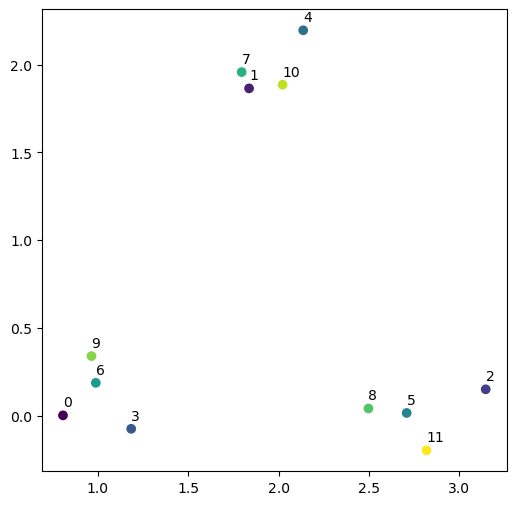

In [317]:
# Dados
np.random.seed(2360873)
x = np.random.normal([1,2,3]*4, .2, 12)
y = np.random.normal([0,2,0]*4, .2, 12)

pontos = pd.DataFrame(np.c_[x,y], columns=['x', 'y'])
# pontos = pd.DataFrame({'x': x, 'y':y})

# plot
fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)

cores = pontos.index.values
ax.scatter(pontos.x, pontos.y, c=cores)

for idx, col in pontos.iterrows():
    ax.annotate(idx, (col.x, col.y + .05))

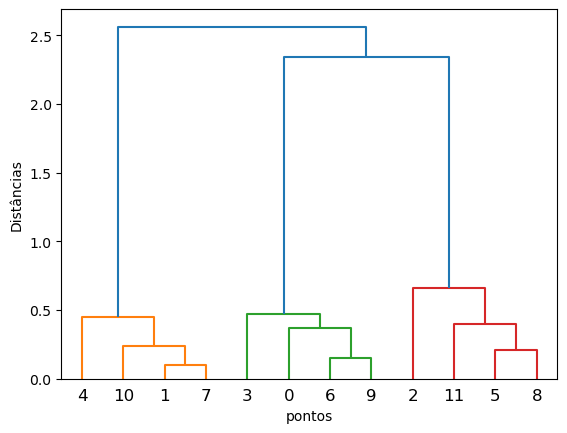

In [342]:
# Rodando o dendrograma

dend = shc.dendrogram(shc.linkage(pontos, method='complete'))
plt.xlabel('pontos')
plt.ylabel('Distâncias')
plt.show()

O eixo x apresenta os pontos. O eixo y apresenta uma distância, ou seja, a distância de agrupamento.

- Uma indicação interpretada a partir do gráfico é que a melhor separação, ou número, de grupos é 3. Pois é nítido que há uma grande distância entre estes três grupos, como indica o eixo y.

- Mas vale lembrar que o melhor agrupamento é aquele que corresponde a uma boa análise descritiva, partindo de um determinado objetivo de análise.

##### Analisando o banco de dados dos penguins

In [321]:
# com outros dados 
peng = sns.load_dataset('penguins')
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [354]:
df = peng.select_dtypes('number').dropna()
# Padronizando
df_pad = StandardScaler().fit_transform(df)

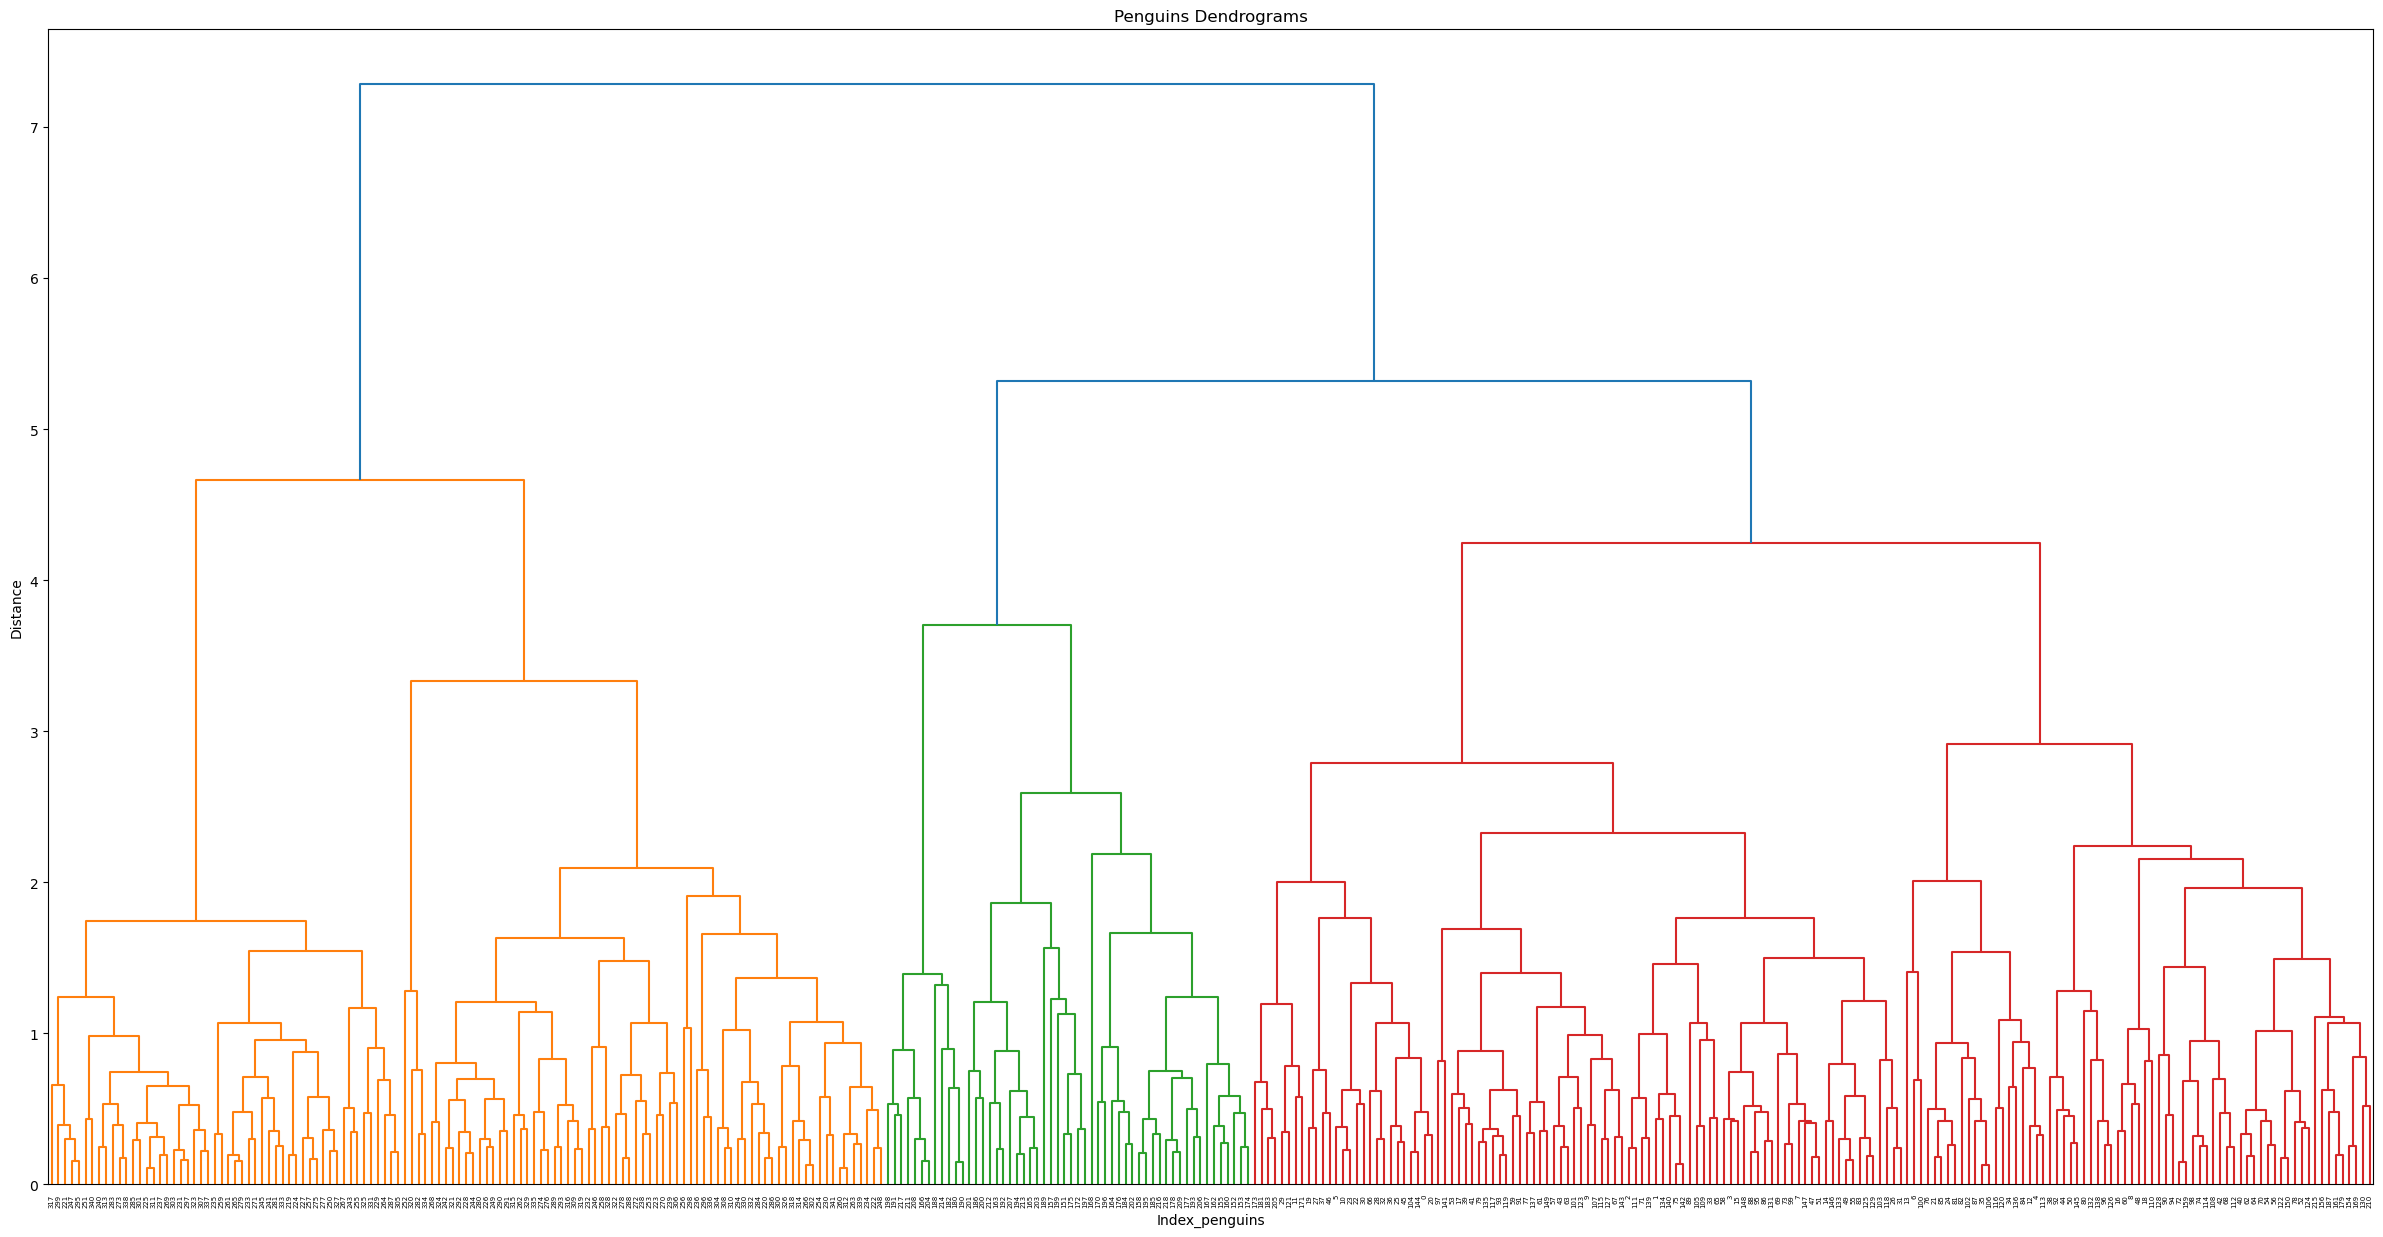

In [364]:
plt.figure(figsize=[30,15])

plt.title('Penguins Dendrograms')

dend = shc.dendrogram(shc.linkage(df_pad, method='complete'))
plt.xlabel('Index_penguins')
plt.ylabel('Distance')
plt.savefig('peng_dendrogram.png', dpi=200)

O modelo também sugere um agrupamento de 3 grupos.

## 4 - Tipos de ligação

- Compreender os diferentes tipos de ligação em algoritmos de agrupamento
- Analisar como diferentes ligações afetam os resultados do agrupamento
- Aplicar diferentes tipos de ligação em conjuntos de dados.


É a forma como vamos conectar um elemento a um conjunto de pontos já agrupados. Este elemento pode ser um ponto ou outro agrupamento de pontos. Há várias formas de definir esse critério...

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn. preprocessing import StandardScaler
from sklearn. cluster import KMeans

import scipy.cluster.hierarchy as shc

### Parâmetros do algoritmo - Tipos de ligação

| | |
|:-:|:-:|
|***Single linkage*** (ligação simples): a distância de um ponto ao cluster é o mínimo entre todas as distâncias do ponto a cada ponto do grupo.| ***Complete linkage*** (ligação completa): A distância de um ponto ao cluste é o máximo entre todas as distâncias do ponto a cada ponto do grupo. |
|<div>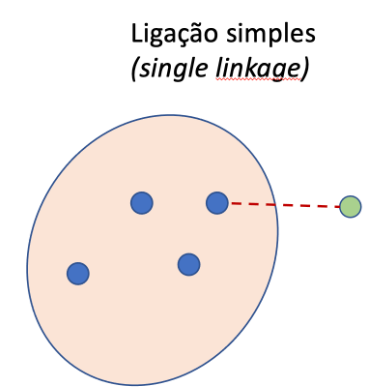</div> | <div>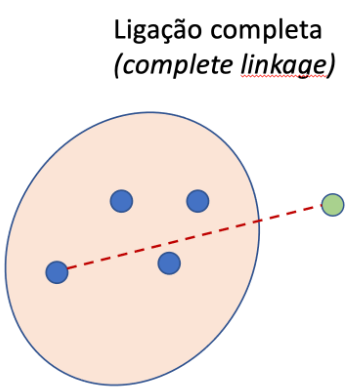</div>|
|***Average linkage*** (Ligação média): A distância de um ponto ao cluster é a média entre todas as distâncias do ponto ao grupo | ***Ward linkage*** (ligação Ward): Esse método se baseia na soma de quadrados das distâncias (SQD) de cada ponto ao centróide do seu respectivo grupo. A distância entre dois clusters se define como o aumento na SQD se juntarmos esses dois grupos.|
|<div>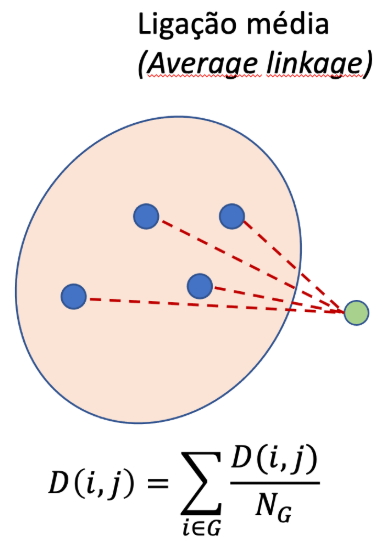</div>|<div>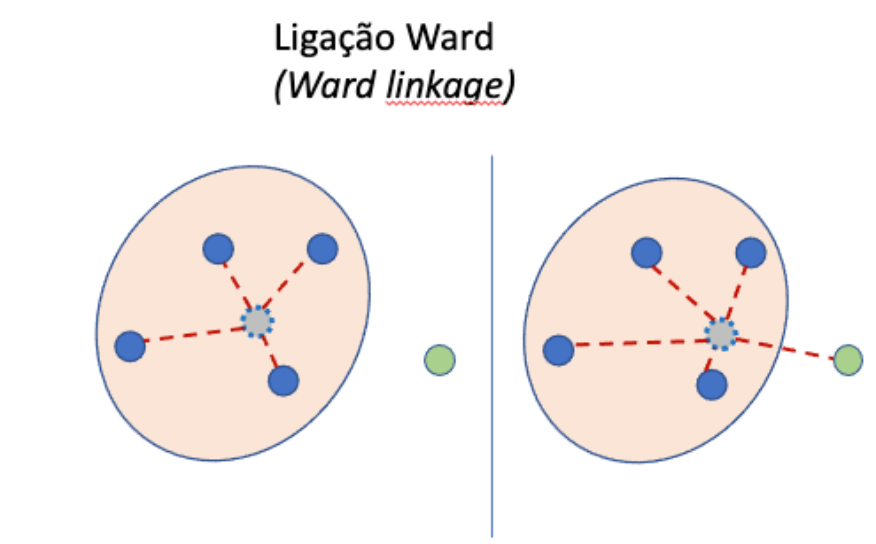</div> |


<!-- ![image-6.png](attachment:image-6.png) -->
<!-- ![image-4.png](attachment:image-4.png) -->

##### Dados sintéticos

https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-hierarchical-clustering

In [24]:
from sklearn import datasets

In [26]:
X1, Y1 = datasets.make_moons(n_samples=400,
                            noise=.05,
                            random_state=2360873)

X2, Y2 = datasets.make_circles(n_samples=390,
                             noise=.01,
                             factor=.5)

X3, Y3 = datasets.make_blobs(n_samples=380, random_state=12345)

X4, Y4 = datasets.make_blobs(n_samples=450, random_state=12345)
X4 = np.dot(X4, [[1,2], [2,2]])

X = [X1, X2, X3, X4]
Y = [Y1, Y2, Y3, Y4]

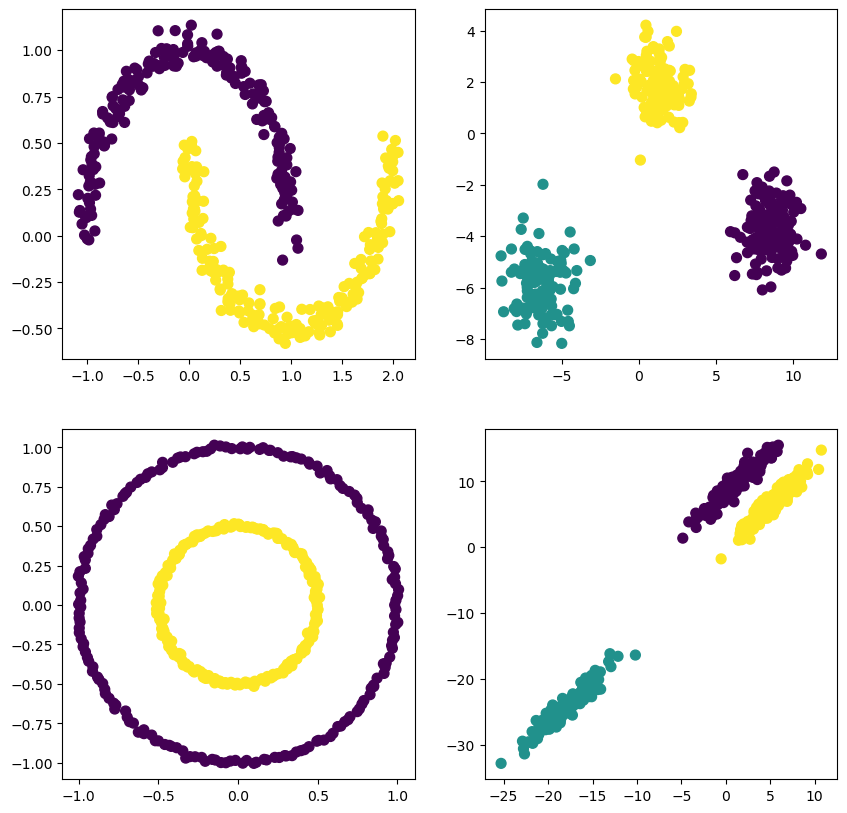

In [60]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

for i in range(4):
    ax[i%2, i//2].scatter(X[i][:,0], X[i][:,1], c = Y[i], marker='o', s=50)

In [159]:
# Avaliando os agramerativos

ls = [] # Ligação simples
lc = [] # Ligação completa
lm = [] # Ligação média
wd = [] # Ligação Ward
km = [] # K-means

mt = [ls, lc, lm, wd, km]
metodos = ['single', 'complete', 'average', 'ward', 'k-means']

for i in range(4):
    for j in range(4):
        mt[j].append(AgglomerativeClustering(n_clusters=len(np.unique(Y[i])), linkage=metodos[j]).fit(X[i]))

for i in range(4):
    mt[4].append(KMeans(n_clusters=len(np.unique(Y[i]))).fit(X[i]))

C:\Users\duduj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\duduj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\duduj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\duduj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [161]:
# Os retornos nas listas
mt

[[AgglomerativeClustering(linkage='single'),
  AgglomerativeClustering(linkage='single'),
  AgglomerativeClustering(linkage='single', n_clusters=3),
  AgglomerativeClustering(linkage='single', n_clusters=3)],
 [AgglomerativeClustering(linkage='complete'),
  AgglomerativeClustering(linkage='complete'),
  AgglomerativeClustering(linkage='complete', n_clusters=3),
  AgglomerativeClustering(linkage='complete', n_clusters=3)],
 [AgglomerativeClustering(linkage='average'),
  AgglomerativeClustering(linkage='average'),
  AgglomerativeClustering(linkage='average', n_clusters=3),
  AgglomerativeClustering(linkage='average', n_clusters=3)],
 [AgglomerativeClustering(),
  AgglomerativeClustering(),
  AgglomerativeClustering(n_clusters=3),
  AgglomerativeClustering(n_clusters=3)],
 [KMeans(n_clusters=2),
  KMeans(n_clusters=2),
  KMeans(n_clusters=3),
  KMeans(n_clusters=3)]]

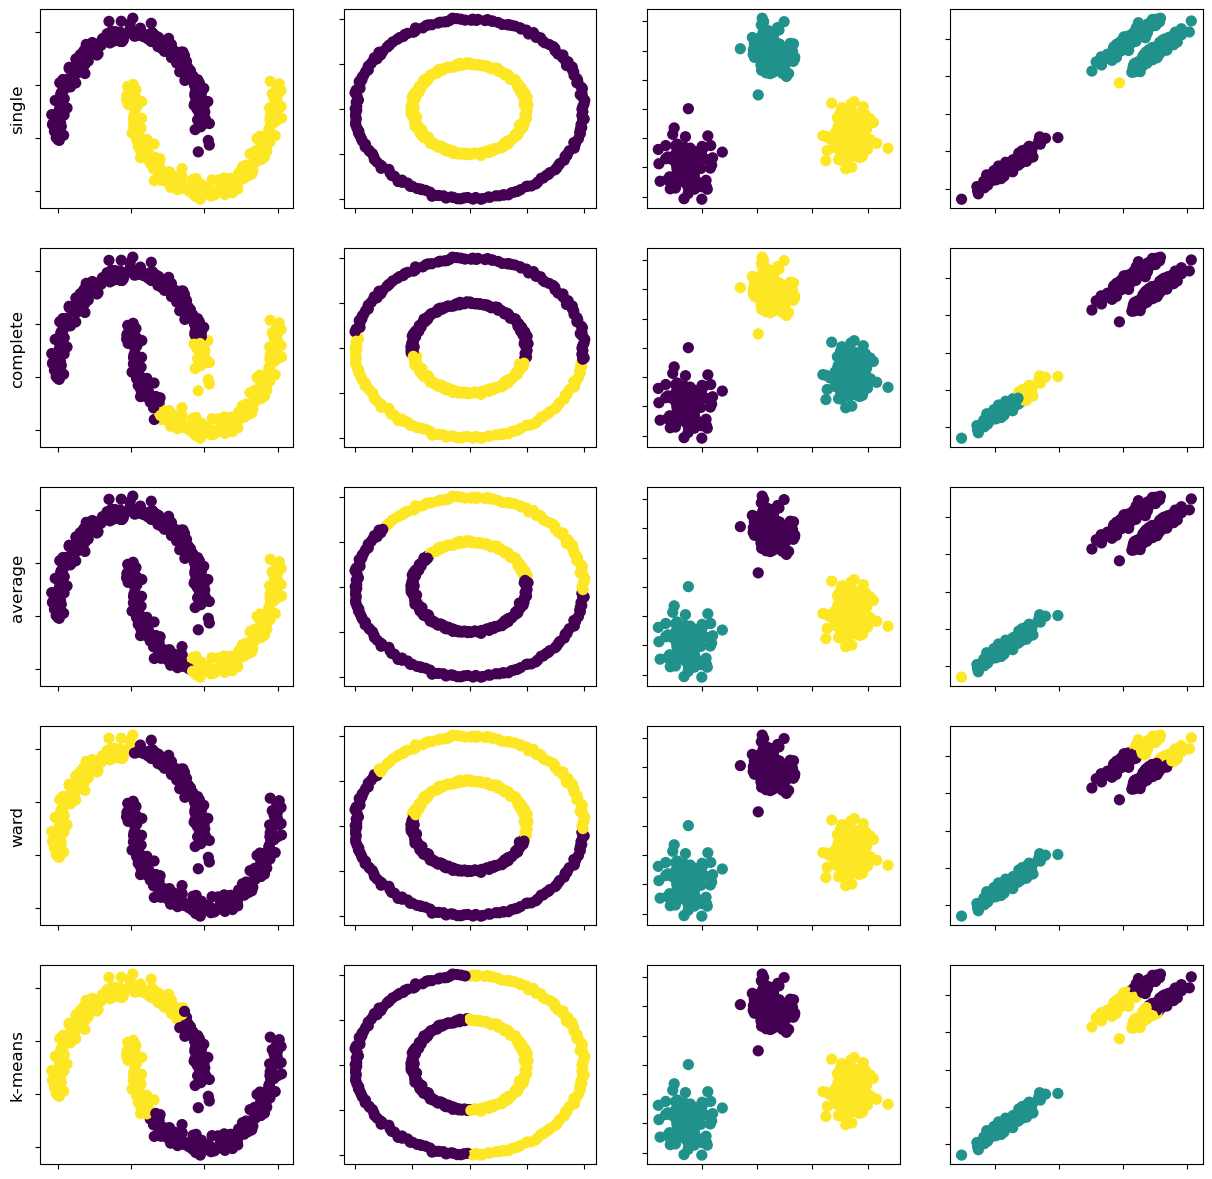

In [163]:
# Visualizando

fig, ax = plt.subplots(nrows=5, ncols=4, figsize=[15,15])

for i in range(4):
    for j in range(5):
        ax[j, i].scatter(X[i][:,0], X[i][:,1], c=mt[j][i].labels_, marker='o', s=50)

        ax[j, i].set_yticklabels([])
        ax[j, i].set_xticklabels([])
        if i==0:
            ax[j, i].set_ylabel(metodos[j], fontsize='large')        

##### Vamos testar para 4 agrupamentos


C:\Users\duduj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\duduj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\duduj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\duduj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

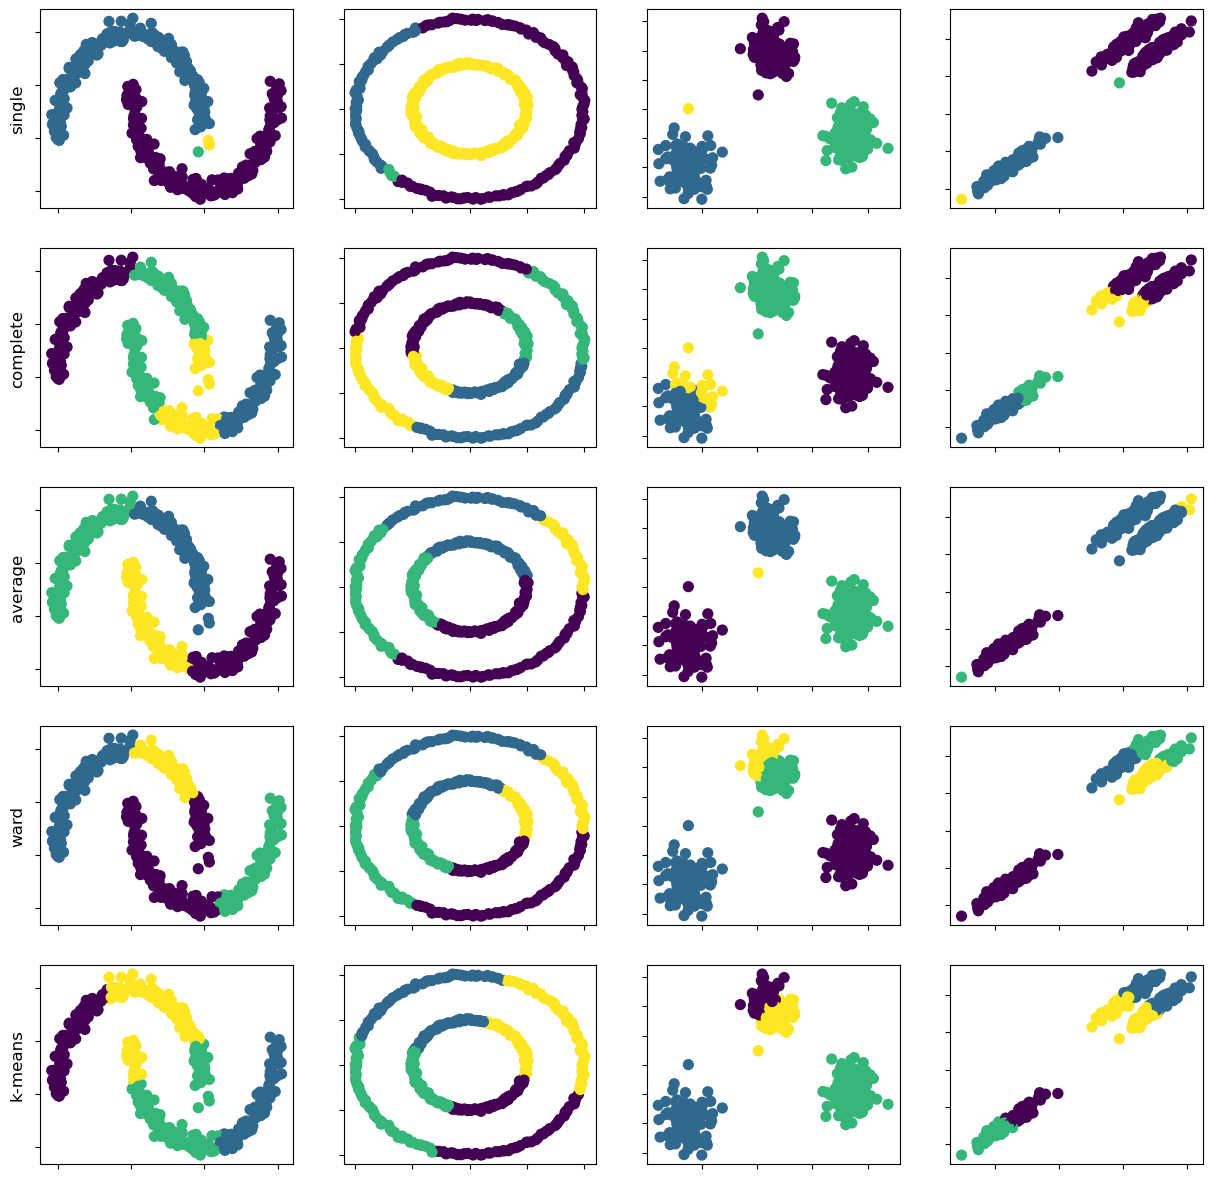

In [175]:
# Avaliando os agramerativos

ls = [] # Ligação simples
lc = [] # Ligação completa
lm = [] # Ligação média
wd = [] # Ligação Ward
km = [] # K-means

mt = [ls, lc, lm, wd, km]
metodos = ['single', 'complete', 'average', 'ward', 'k-means']

for i in range(4):
    for j in range(4):
        mt[j].append(AgglomerativeClustering(n_clusters=4, linkage=metodos[j]).fit(X[i]))

for i in range(4):
    mt[4].append(KMeans(n_clusters=4).fit(X[i]))

# Visualizando

fig, ax = plt.subplots(nrows=5, ncols=4, figsize=[15,15])

for i in range(4):
    for j in range(5):
        ax[j, i].scatter(X[i][:,0], X[i][:,1], c=mt[j][i].labels_, marker='o', s=50)

        ax[j, i].set_yticklabels([])
        ax[j, i].set_xticklabels([])
        if i==0:
            ax[j, i].set_ylabel(metodos[j], fontsize='large')    

## 5 - Distância

- Compreender a aplicação da distância euclidiana em dados mistos
- Aprender sobre a distância de Manhattan e a distância Dice
- Conhecer a distância Gower e sua utilidade em dados mistos

#### Trabalhando com dados mistos

Precisamos de uma definição de distância que acomode dados qualitativos como:
- Sexo
- Raça do pinguim
- Tipo de cartão etc.

## Distâncias

Podemos usar diversos tipos de distância para rodar o nosso algoritmo. Vamos comentar algumas que terão efeito prático sobre os nossos próximos passos:

- Distância euclidiana: a distância mais intuitiva e comum de se utilizar para variáveis quantitativas.
- Distância Manhattan: É a distância percorrida entre dois pontos quando só se anda na vertical ou na horizontal. Tem vantagens para se calcular, e é utilizada na distância de Gower.
- Distância dice: é uma medida de distância para dados qualitativos. É baseada na quantidade de características em comum entre duas observações.
- Distância de Gower: É popular para a realização de agrupamentos com variáveis binárias e contínuas na mesma tabela. Ela conjuga a distância de Dice para variáveis discretas e distância Manhattan para variáveis contínuas.

| | |
|:-:|:-:|
| Distância Euclidiana | Distância de Manhattan |
| <div>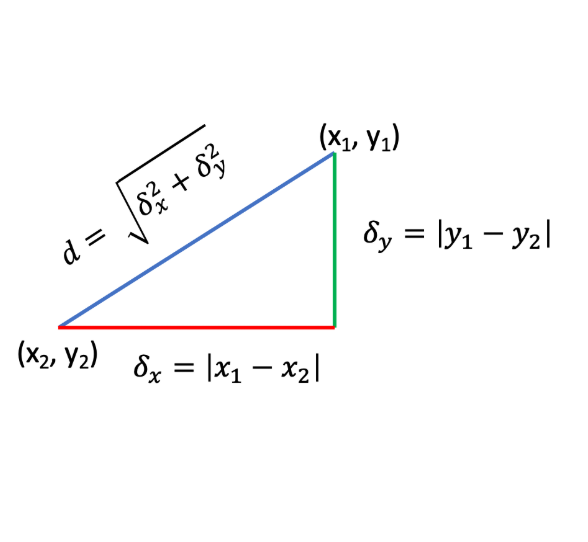</div> | <div>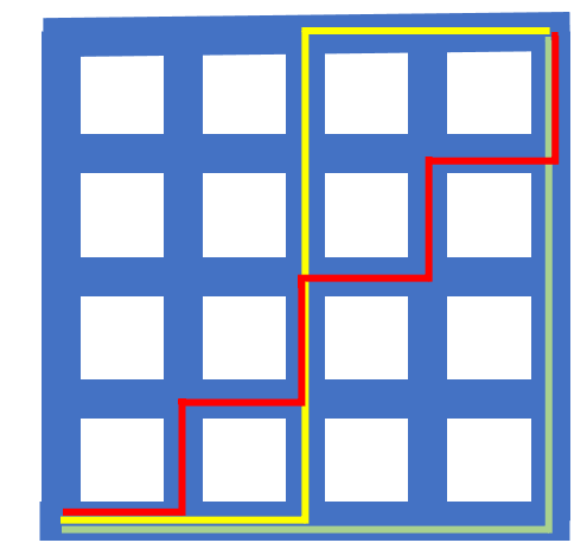</div> |
| Distância Dice | Distância de Gower |
| <div>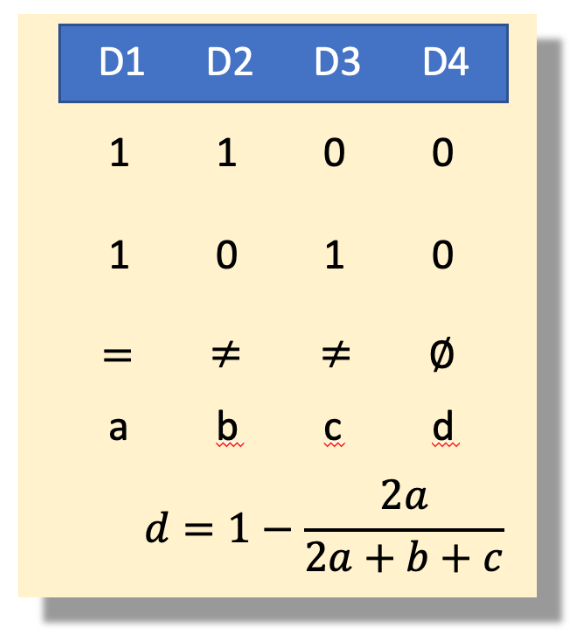</div> | <div>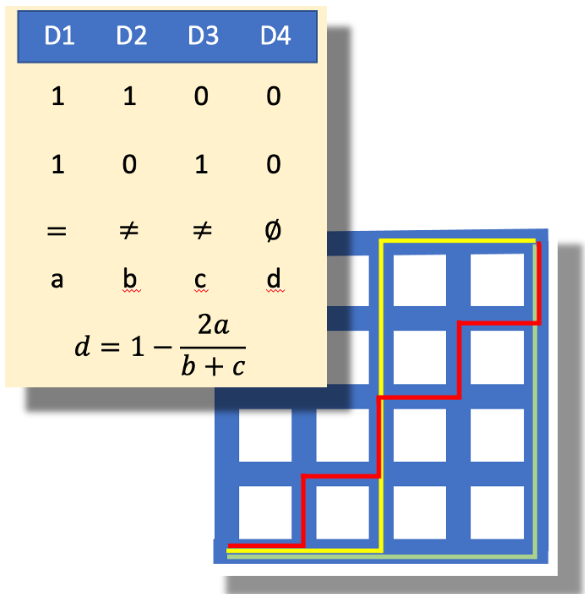</div> |


## 6 - Agrupamento com dados mistos

- Compreender o processo de agrupamento com dados mistos
- Aprender a tratar dados ausentes e criar variáveis dummy
- Praticar o cálculo da matriz de distância e a execução do agrupamento

##### Tipos de dados misturados

Vamos fazer uma aplicação em uma base, misturando dados categorizados e dados numéricos utilizando a distância de Gower.

Os métodos hierárquicos podem ser executados tendo como input a matriz de distâncias, e é isso que vamos fazer. Antes de começar é importante planejar os passos a serem seguidos, então vamos fazer isso. Vamos executar os seguintes passos:

- Tratamento de dados:
    - Missing: decidir o que fazer com eles. Eliminar ou preencher?
    - Criar *dummies* para dados categorizados
    - Identificar variáveis *dummy*
- Calcular a matriz de distâncias com o método de **Gower**
- Executar o agrupamento hierárquico a partir dessa matriz
- Avaliar os agrupamentos

In [185]:
!pip install gower

In [6]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from gower import gower_matrix
from scipy.spatial.distance import pdist, squareform

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Carregando dados 

peng = sns.load_dataset('penguins')
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


##### Tratamento de dados

Aqui, precisamos decidir o que fazer com dados não preenchidos. 

- Os dados quantitativos não preenchidos tem uma resposta mais ou menos óbvia: removê-los. Digo isto porque há apenas dois registros com dados não preenchidos, e todas as variáveis quantitativas estão sem preenchimento para essas duas observações.

- Dados discretos não preenchidos: aqui já dá mais pra discutir o que fazer. Há mais registros sem o preenchimento de sexo. Talvez a determinação do sexo de um pinguim não seja trivial em determinadas situações. Podemos adotar duas posturas:
    - Eliminar os dados com valores faltantes: os prós são a velocidade e o pragmatismo, os contras são a eliminação de dados, e que podemos continuar com o mesmo problema se quisermos aplicar o modelo para indivíduos fora da amostra.
    - Preencher com o valor modal ou um valor aleatório: o ponto pró é o aproveitamento dos dados dos indivíduos com as demais variáveis preenchidas, o ponto contra é a introdução de ruído no modelo.
    - Preenchimento por modelo (ex: por random forest): pontos pró são aproveitamento das observações, introdução reduzida de ruído, ter um método para aplicação em outras amostras. Pontos contra: tempo de desenvolvimento e aumento da complexidade do modelo.

In [9]:
peng.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [10]:
# removendo as variáveis missing

variaveis = peng.columns.values[2:] # Não considerando species e island
variaveis_cat = variaveis[-1]

# Removendo missing e criando dummy
peng2 = pd.get_dummies(peng[variaveis].dropna())
print(peng2.shape)
peng2.head()

(333, 6)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
4,36.7,19.3,193.0,3450.0,True,False
5,39.3,20.6,190.0,3650.0,False,True


In [11]:
peng2.columns.values

array(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex_Female', 'sex_Male'], dtype=object)

In [12]:
# Definindo um novo vetor de variáveis

vars_cat = [True if x in {'sex_Female', 'sex_Male'} else False for x in peng2.columns]

In [13]:
vars_cat # Variáveis qualitativas (categóricas)

[False, False, False, False, True, True]

##### Calculando as distâncias

A função ```gower_matrix``` calcula a matriz de distâncias utilizando a distância de Gower. Como já vimos, essa distância é a distância 'dice' para variáveis categorizadas e a distância 'Manhattan' para variáveis contínuas.

Como as variáveis categorizadas estão em formato de *dummy* (elas **tem** que estar como *dummy*), precisamos indicar para o algoritmo quais são as variáveis categorizadas. Vamos fazer isso no parâmetro ```cat_features```.

In [15]:
# Calculando
distancia_gower = gower_matrix(peng2, cat_features=vars_cat)

In [59]:
print(distancia_gower.shape)
distancia_gower[:5,:5] # Primeira 5 linhas e colunas

(333, 333)


array([[0.        , 0.37799034, 0.41719112, 0.40757075, 0.06896389],
       [0.37799034, 0.        , 0.06763994, 0.09064583, 0.4162814 ],
       [0.41719112, 0.06763994, 0.        , 0.06252081, 0.42362407],
       [0.40757075, 0.09064583, 0.06252081, 0.        , 0.3926184 ],
       [0.06896389, 0.4162814 , 0.42362407, 0.3926184 , 0.        ]],
      dtype=float32)

Precisamos ajustar o formato da matriz de distâncias para alimentar o algoritmo com tal objeto. Para isso, utilizaremos a função `squareform` do numpy.

In [18]:
gdv = squareform(distancia_gower, force='tovector')

In [19]:
print(gdv.shape) # a matriz foi convertida em um objeto flat, ou seja, um vetor
gdv

(55278,)


array([0.37799034, 0.41719112, 0.40757075, ..., 0.4364172 , 0.05259424,
       0.39969596], dtype=float32)

##### Treinando o agrupamento

Agora vamos usar a função ```linkage``` do scipy, indicando o método como *complete*, para rodar este algoritmo com a matriz de distâncias indicada. Em seguida, por uma questão de conveniência, vamos transformar o objeto com o modelo 'treinado' em um *data frame*.

In [21]:
z = linkage(gdv, method='complete')
# Diferente dos métodos de treinamento até então estudados

In [22]:
# Gerando um Data frame do agrupamento
df_z = pd.DataFrame(z, columns=['id1', 'id2', 'dist', 'n'])
df_z.head()

,id1,id2,dist,n
0,31.0,101.0,0.005951,2.0
1,42.0,46.0,0.006061,2.0
2,220.0,304.0,0.007730,2.0
3,254.0,305.0,0.007730,2.0
4,260.0,295.0,0.008170,2.0


Os indivíduos são as duas primeiras colunas e a distâncias entre eles a terceira colunas. `n` indica a qual grupo o indivíduo pertence.

##### Dendrograma

- Utilizando a função `dendrogram` do scipy.

Leaves = 333


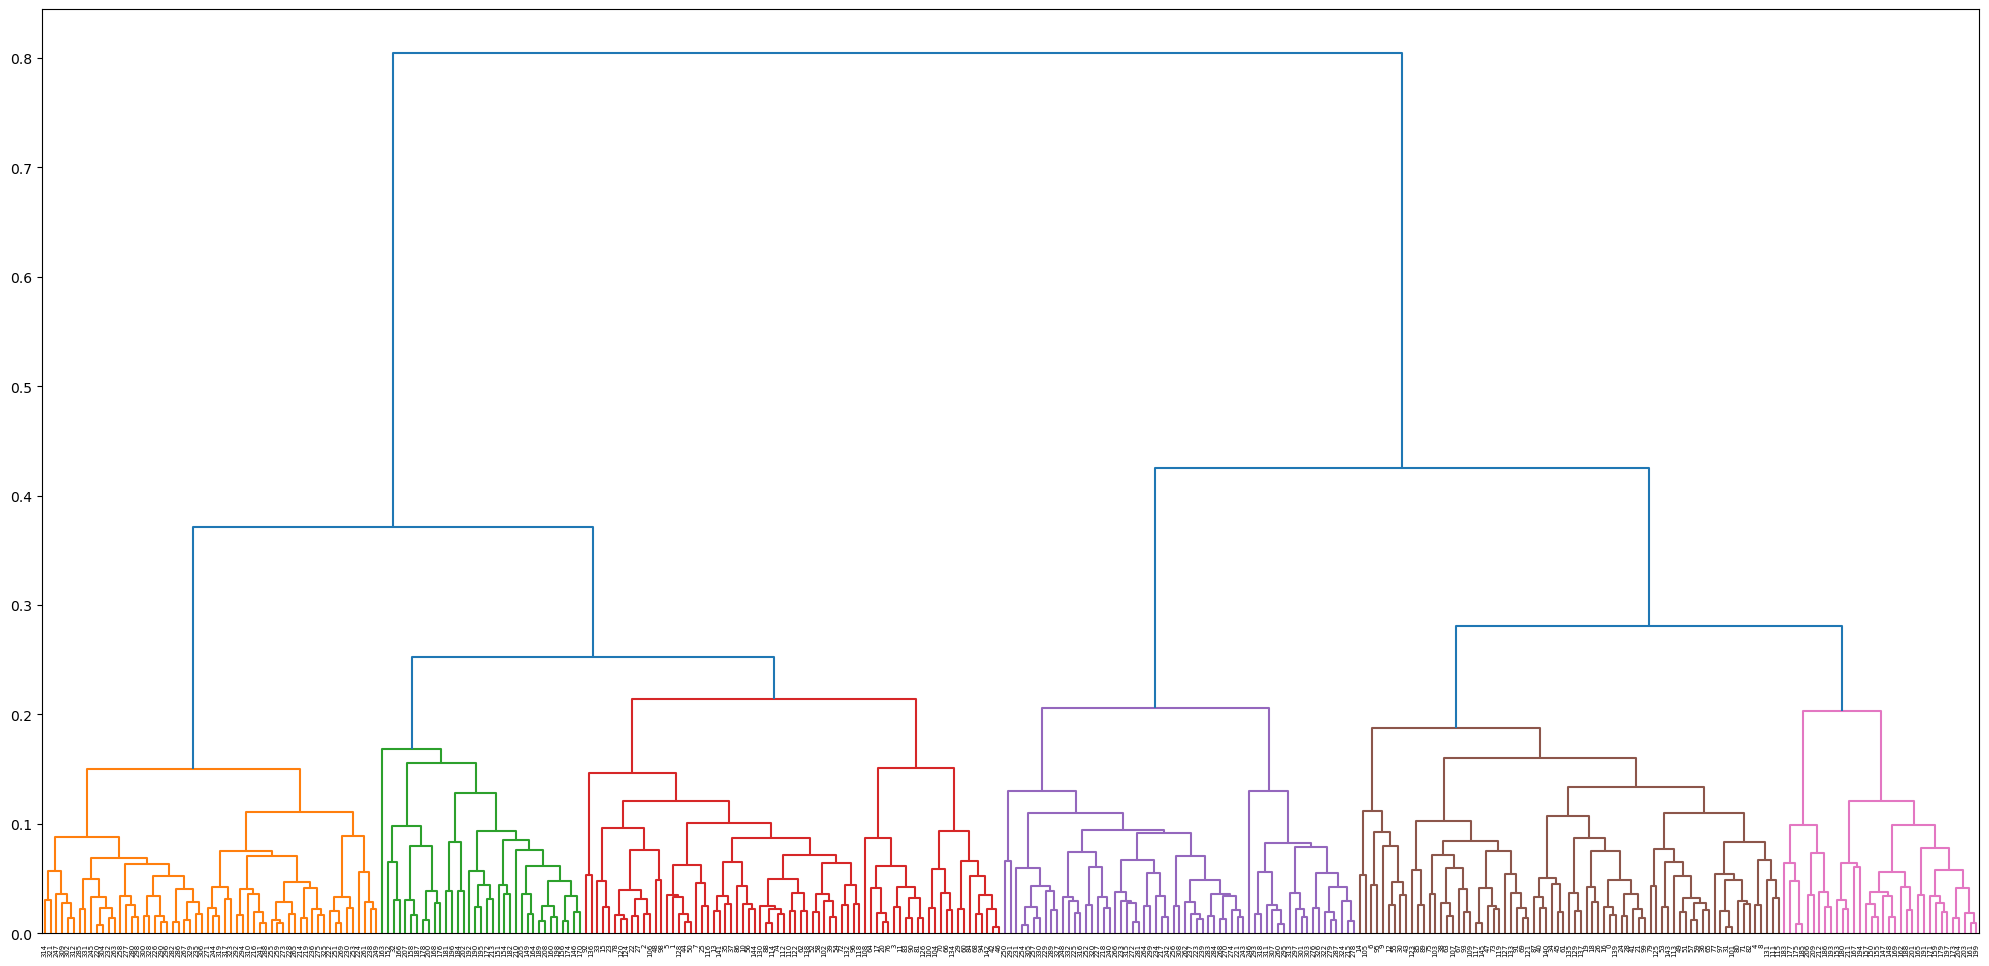

In [25]:
fig, ax = plt.subplots(figsize=[25,12])
dn = dendrogram(z, 
                truncate_mode='level', 
                p=30, 
                show_leaf_counts=True, 
                color_threshold=.24)
plt.savefig('dendrogram_mixed_data.png', dpi=200)
print(f'Leaves = {len(dn['leaves'])}')

Vamos marcar os grupos na tabela original e fazer uma rápida inspeção para identificar os grupos

In [27]:
# Frequência de cada grupo

# Utilizando a função fcluster
peng2['grupo'] = fcluster(z, 6, criterion='maxclust')
print(peng2.grupo.value_counts())
peng2.head()

grupo
5    73
3    72
4    61
1    58
2    35
6    34
Name: count, dtype: int64


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_Female,sex_Male,grupo
0,39.1,18.7,181.0,3750.0,False,True,5
1,39.5,17.4,186.0,3800.0,True,False,3
2,40.3,18.0,195.0,3250.0,True,False,3
4,36.7,19.3,193.0,3450.0,True,False,3
5,39.3,20.6,190.0,3650.0,False,True,5


Fazendo uma análise descritiva dos grupos e tentar identificar as características deles quanto a espécie e sexo do pinguim.

In [29]:
peng3 = peng.reset_index().merge(peng2.reset_index(), how='left')
peng3.groupby(['sex', 'species', 'grupo'])['index'].count().unstack().fillna(0)

grupo              1.0   2.0   3.0   4.0   5.0   6.0
sex    species                                      
Female Adelie      0.0   1.0  72.0   0.0   0.0   0.0
       Chinstrap   0.0  34.0   0.0   0.0   0.0   0.0
       Gentoo     58.0   0.0   0.0   0.0   0.0   0.0
Male   Adelie      0.0   0.0   0.0   0.0  73.0   0.0
       Chinstrap   0.0   0.0   0.0   0.0   0.0  34.0
       Gentoo      0.0   0.0   0.0  61.0   0.0   0.0

Os grupos estão muito bem separados para essa análise especificamente. Eles são capazes de separar muito bem pelo sexo dos pinguins, mas isso se deve ao fato de uma das variáveis que alimetou o modelo ser exatamente o sexo do pinguins (não parece trazer muita informação nova nesse contexo).

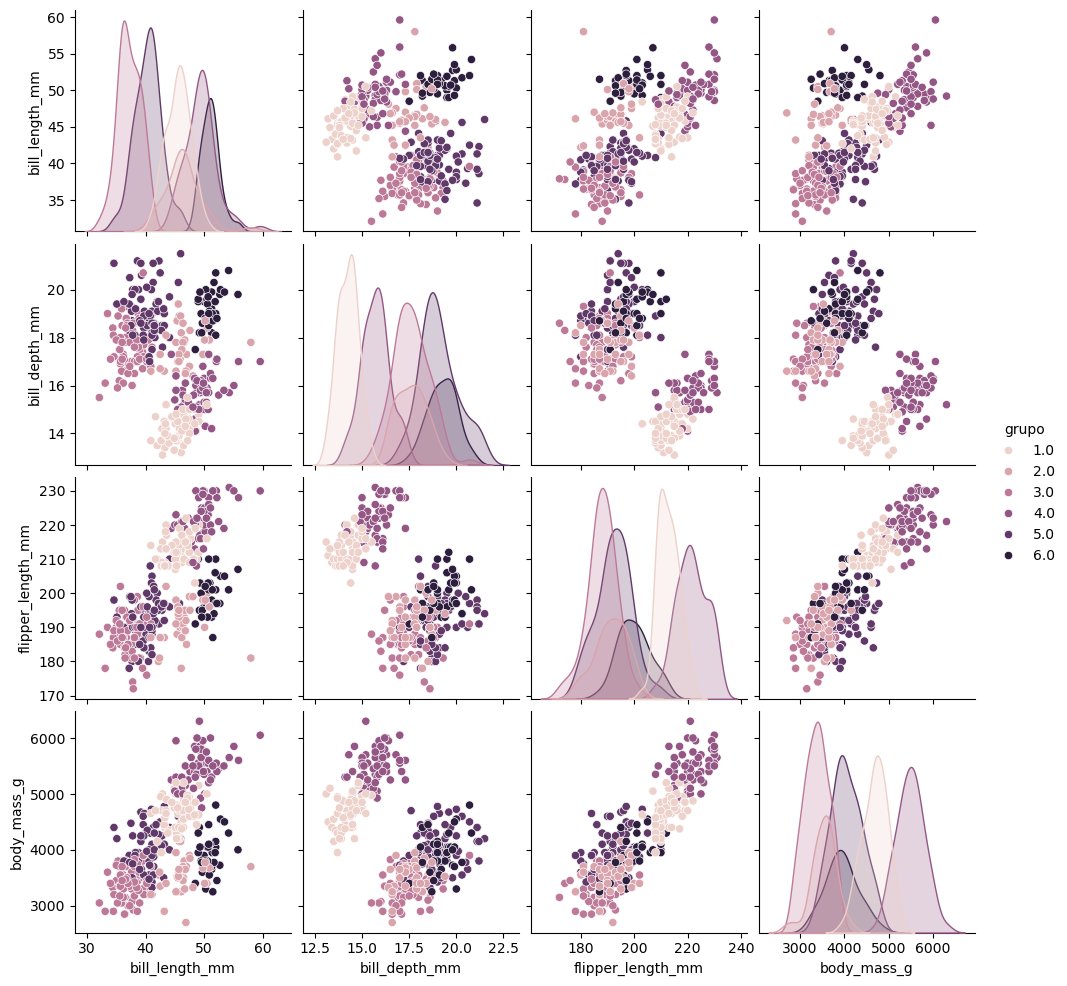

In [31]:
# Vejamos um pairplot
vars = ['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g','grupo']

sns.pairplot(peng3[vars], hue='grupo')

## Classificação dos grupos

- Compreender a análise de agrupamento hierárquico e classificação de grupos
- Aprender a preparar a base de dados para rodar o Random Forest
- Interpretar os resultados obtidos com o uso do Random Forest

É comum, em projetos de agrupamentos, precisarmos de um procedimento que classifica novas observações aos grupos que obtivemos.

No *k-means* podemos adotar um critério de classificação natural utilizando o ```.fit()```, que vai avaliar a distância da nova observação a cada um dos centróides, e classificar naquele grupo que resultar a menor distância. Mas e nos métodos hierárquicos? Você consegue pensar em como classificar novas observações?

Bem, não há um método natural. Mas você pode utilizar todos os algoritmos de classificação que já conhece para fazer a classificação dos métodos hierárquicos, como a regressão logística, árvore de classificação, random forest etc. Pode utilizar as mesmas técnicas de *cross-validation* para garantir a qualidade e tudo. Uma característica é que a acurácia costuma ser bem razoável, pois os grupos procuram ser definidos como função dos dados, o que deve facilitar um pouco as coisas para o algoritmo de classificação.

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [149]:
peng3.head()

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_Female,sex_Male,grupo
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,False,True,5.0
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,True,False,3.0
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,True,False,3.0
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,True,False,3.0


In [65]:
print(peng3.columns)

# Selecionar variável explicativas (features) e eliminar missings
X = peng3.dropna()[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex_Female', 'sex_Male']]

# Selecionando variável resposta (target)
y = peng3.dropna()['grupo']

Index(['index', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'sex_Female', 'sex_Male',
       'grupo'],
      dtype='object')


In [67]:
# Separando em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=2360873)

In [69]:
# Definindo a RandomForest
clf = RandomForestClassifier(random_state=2360873, n_estimators=50)

In [131]:
# Definindo os parâmetros para um grid search

grid_param = {'ccp_alpha':np.arange(0, .1, .01)}
np.arange(0, .1, .01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])

In [137]:
grid = GridSearchCV(
    estimator = clf, 
    param_grid = grid_param,
    cv=4,
    verbose = 100    
)

grid.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV 1/4; 1/10] START ccp_alpha=0.0..............................................
[CV 1/4; 1/10] END ...............ccp_alpha=0.0;, score=0.985 total time=   0.0s
[CV 2/4; 1/10] START ccp_alpha=0.0..............................................
[CV 2/4; 1/10] END ...............ccp_alpha=0.0;, score=0.985 total time=   0.0s
[CV 3/4; 1/10] START ccp_alpha=0.0..............................................
[CV 3/4; 1/10] END ...............ccp_alpha=0.0;, score=1.000 total time=   0.0s
[CV 4/4; 1/10] START ccp_alpha=0.0..............................................
[CV 4/4; 1/10] END ...............ccp_alpha=0.0;, score=1.000 total time=   0.0s
[CV 1/4; 2/10] START ccp_alpha=0.01.............................................
[CV 1/4; 2/10] END ..............ccp_alpha=0.01;, score=1.000 total time=   0.0s
[CV 2/4; 2/10] START ccp_alpha=0.01.............................................
[CV 2/4; 2/10] END ..............ccp_alpha=0.01;

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_estimators=50,
                                              random_state=2360873),
             param_grid={'ccp_alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])},
             verbose=100)

In [138]:
# Relatório das saídas
relatorio = pd.DataFrame(grid.cv_results_)
relatorio

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.079922,0.015408,0.005252,0.000434,0.00,{'ccp_alpha': 0.0},0.985075,0.985075,1.000000,1.0,0.992537,0.007463,7
1,0.074213,0.000621,0.005244,0.000829,0.01,{'ccp_alpha': 0.01},1.000000,0.985075,1.000000,1.0,0.996269,0.006463,1
2,0.072091,0.001532,0.004498,0.000351,0.02,{'ccp_alpha': 0.02},1.000000,0.985075,1.000000,1.0,0.996269,0.006463,1
3,0.070176,0.001776,0.005247,0.000818,0.03,{'ccp_alpha': 0.03},1.000000,0.985075,1.000000,1.0,0.996269,0.006463,1
4,0.072470,0.001943,0.005002,0.000004,0.04,{'ccp_alpha': 0.04},1.000000,0.985075,1.000000,1.0,0.996269,0.006463,1
5,0.075692,0.001755,0.005243,0.000435,0.05,{'ccp_alpha': 0.05},1.000000,0.985075,1.000000,1.0,0.996269,0.006463,1
6,0.075290,0.003609,0.005124,0.000542,0.06,{'ccp_alpha': 0.06},1.000000,0.985075,1.000000,1.0,0.996269,0.006463,1
7,0.069565,0.003380,0.004508,0.000500,0.07,{'ccp_alpha': 0.07},1.000000,0.985075,0.984848,1.0,0.992481,0.007520,8
8,0.069110,0.001390,0.004748,0.000432,0.08,{'ccp_alpha': 0.08},1.000000,0.985075,0.984848,1.0,0.992481,0.007520,8
9,0.070033,0.002136,0.005502,0.000873,0.09,{'ccp_alpha': 0.09},0.985075,0.985075,0.984848,1.0,0.988749,0.006496,10


In [139]:
grid.best_params_

{'ccp_alpha': 0.01}

In [143]:
# Fitting da árvore no melhor parâmetro

clf = RandomForestClassifier(random_state=2360873, n_estimators=50, ccp_alpha=.01)
clf.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0.01, n_estimators=50, random_state=2360873)

In [145]:
clf.score(X_test, y_test)

1.0